## Gender-Classifier

If you are running this locally, download and unpack the male/female pictures from [here](https://www.dropbox.com/s/nov493om2jmh2gp/male_female.tgz?dl=0). These images and labels were obtained from [Crowdflower](https://www.crowdflower.com/data-for-everyone/).

Your goal is to build an image classifier that will recognize the gender of a person from pictures.

- Have a look at the directory structure and inspect a couple of pictures
- Design a model that will take a color image of size 64x64 as input and return a binary output (female=0/male=1)
- Feel free to introduce any regularization technique in your model (Dropout, Batch Normalization, Weight Regularization)
- Compile your model with an optimizer of your choice
- Using `ImageDataGenerator`, define a train generator that will augment your images with some geometric transformations. Feel free to choose the parameters that make sense to you.
- Define also a test generator, whose only purpose is to rescale the pixels by 1./255
- use the function `flow_from_directory` to generate batches from the train and test folders. Make sure you set the `target_size` to 64x64.
- Use the `model.fit_generator` function to fit the model on the batches generated from the ImageDataGenerator. Since you are streaming and augmenting the data in real time you will have to decide how many batches make an epoch and how many epochs you want to run
- Train your model (you should get to at least 85% accuracy)
- Once you are satisfied with your training, check a few of the misclassified pictures. Are those sensible errors?

In [28]:
# Uncomment the following 3 lines if you want to download images in the process. Otherwise, specify the path.
# !wget https://www.dropbox.com/s/nov493om2jmh2gp/male_female.tgz?dl=0 -O male_female.tgz
# !tar -xzvf male_female.tgz
# data_path = '../data/male_female/'
data_path = './data/'

In [18]:
import pandas as pd
from itertools import islice
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Embedding,
    Flatten,
    MaxPooling2D)
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K

In [19]:
K.clear_session()

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [20]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
__________

In [21]:
train_gen = ImageDataGenerator(rescale = 1./255,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rotation_range = 10,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)

test_gen = ImageDataGenerator(rescale = 1./255)

In [22]:
train = train_gen.flow_from_directory(data_path + '/train',
                                      target_size = (64, 64),
                                      batch_size = 16,
                                      class_mode = 'binary')

test = test_gen.flow_from_directory(data_path + '/test',
                                    target_size = (64, 64),
                                    batch_size = 16,
                                    class_mode = 'binary')

Found 11663 images belonging to 2 classes.
Found 2920 images belonging to 2 classes.


In [23]:
model.fit_generator(train,
                    steps_per_epoch = 800,
                    epochs = 200,
                    validation_data = test,
                    validation_steps = 200)

Epoch 1/200
800/800 [==============================] - 32s 40ms/step - loss: 0.6525 - acc: 0.6823 - val_loss: 0.4917 - val_acc: 0.7657
Epoch 2/200
800/800 [==============================] - 24s 31ms/step - loss: 0.4859 - acc: 0.7553 - val_loss: 0.4534 - val_acc: 0.7888
Epoch 3/200
800/800 [==============================] - 24s 30ms/step - loss: 0.4528 - acc: 0.7737 - val_loss: 0.4403 - val_acc: 0.7801
Epoch 4/200
800/800 [==============================] - 25s 31ms/step - loss: 0.4190 - acc: 0.7979 - val_loss: 0.3872 - val_acc: 0.8076
Epoch 5/200
800/800 [==============================] - 25s 31ms/step - loss: 0.4082 - acc: 0.8080 - val_loss: 0.4879 - val_acc: 0.7469
Epoch 6/200
800/800 [==============================] - 24s 31ms/step - loss: 0.3880 - acc: 0.8128 - val_loss: 0.4278 - val_acc: 0.7882
Epoch 7/200
800/800 [==============================] - 24s 31ms/step - loss: 0.3666 - acc: 0.8274 - val_loss: 0.3812 - val_acc: 0.8083
Epoch 8/200
800/800 [==============================] - 

800/800 [==============================] - 24s 30ms/step - loss: 0.1593 - acc: 0.9352 - val_loss: 0.3062 - val_acc: 0.8756
Epoch 62/200
800/800 [==============================] - 24s 30ms/step - loss: 0.1625 - acc: 0.9324 - val_loss: 0.3270 - val_acc: 0.8794
Epoch 63/200
800/800 [==============================] - 24s 30ms/step - loss: 0.1559 - acc: 0.9379 - val_loss: 0.3814 - val_acc: 0.8606
Epoch 64/200
800/800 [==============================] - 24s 30ms/step - loss: 0.1498 - acc: 0.9361 - val_loss: 0.3379 - val_acc: 0.8781
Epoch 65/200
800/800 [==============================] - 24s 30ms/step - loss: 0.1553 - acc: 0.9369 - val_loss: 0.3327 - val_acc: 0.8609
Epoch 66/200
800/800 [==============================] - 24s 30ms/step - loss: 0.1502 - acc: 0.9396 - val_loss: 0.3477 - val_acc: 0.8769
Epoch 67/200
800/800 [==============================] - 24s 30ms/step - loss: 0.1555 - acc: 0.9345 - val_loss: 0.3515 - val_acc: 0.8672
Epoch 68/200
800/800 [==============================] - 24s 3

800/800 [==============================] - 24s 30ms/step - loss: 0.1007 - acc: 0.9608 - val_loss: 0.3734 - val_acc: 0.8781
Epoch 122/200
800/800 [==============================] - 24s 30ms/step - loss: 0.1056 - acc: 0.9602 - val_loss: 0.3716 - val_acc: 0.8806
Epoch 123/200
800/800 [==============================] - 24s 30ms/step - loss: 0.1043 - acc: 0.9579 - val_loss: 0.4127 - val_acc: 0.8841
Epoch 124/200
800/800 [==============================] - 24s 30ms/step - loss: 0.0987 - acc: 0.9616 - val_loss: 0.3954 - val_acc: 0.8822
Epoch 125/200
800/800 [==============================] - 24s 30ms/step - loss: 0.0996 - acc: 0.9611 - val_loss: 0.4030 - val_acc: 0.8772
Epoch 126/200
800/800 [==============================] - 24s 30ms/step - loss: 0.0997 - acc: 0.9609 - val_loss: 0.4350 - val_acc: 0.8656
Epoch 127/200
800/800 [==============================] - 24s 30ms/step - loss: 0.1004 - acc: 0.9616 - val_loss: 0.3832 - val_acc: 0.8828
Epoch 128/200
800/800 [==============================] 

Epoch 181/200
800/800 [==============================] - 25s 31ms/step - loss: 0.0872 - acc: 0.9654 - val_loss: 0.5367 - val_acc: 0.8697
Epoch 182/200
800/800 [==============================] - 25s 31ms/step - loss: 0.0778 - acc: 0.9713 - val_loss: 0.4624 - val_acc: 0.8684
Epoch 183/200
800/800 [==============================] - 24s 31ms/step - loss: 0.0803 - acc: 0.9704 - val_loss: 0.4494 - val_acc: 0.8803
Epoch 184/200
800/800 [==============================] - 24s 31ms/step - loss: 0.0799 - acc: 0.9686 - val_loss: 0.4190 - val_acc: 0.8766
Epoch 185/200
800/800 [==============================] - 24s 30ms/step - loss: 0.0838 - acc: 0.9680 - val_loss: 0.4583 - val_acc: 0.8722
Epoch 186/200
800/800 [==============================] - 25s 31ms/step - loss: 0.0728 - acc: 0.9726 - val_loss: 0.4127 - val_acc: 0.8844
Epoch 187/200
800/800 [==============================] - 25s 31ms/step - loss: 0.0763 - acc: 0.9704 - val_loss: 0.4288 - val_acc: 0.8810
Epoch 188/200
800/800 [==================

In [24]:
X_test = []
y_test = []
for ts in islice(test, 50):
    X_test.append(ts[0])
    y_test.append(ts[1])

X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

In [25]:
y_pred = model.predict_classes(X_test).ravel()

In [26]:
np.argwhere(y_test != y_pred).ravel()

array([  6,  10,  11,  14,  16,  30,  38,  39,  51,  55,  74,  87, 100,
       104, 119, 122, 133, 148, 149, 156, 161, 166, 178, 184, 201, 209,
       211, 231, 232, 235, 238, 247, 249, 250, 255, 278, 298, 311, 314,
       323, 331, 352, 354, 357, 363, 365, 367, 368, 369, 373, 381, 407,
       418, 439, 447, 450, 456, 461, 470, 483, 487, 494, 509, 515, 524,
       530, 581, 582, 587, 598, 607, 620, 629, 631, 646, 663, 666, 667,
       691, 698, 724, 726, 731, 736, 737, 741, 755, 759, 763, 778])

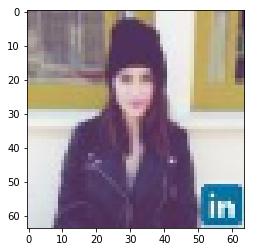

In [27]:
plt.imshow(X_test[14])